In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open('isingmodeldata10.csv', 'r') as isingmodeldata:
    df10 = pd.read_csv(isingmodeldata)
    print(df10)
with open('isingmodeldata20.csv', 'r') as isingmodeldata:
    df20 = pd.read_csv(isingmodeldata)

with open('isingmodeldata50.csv', 'r') as isingmodeldata:
    df50 = pd.read_csv(isingmodeldata)

     magnet    energy      susc  heat_cap        bc     temp
0   0.99718 -1.989100  0.005491  0.065911  0.666581  1.20000
1   0.99275 -1.972910  0.014714  0.137248  0.666399  1.35000
2   0.98642 -1.950910  0.024800  0.185678  0.666178  1.50000
3   0.97496 -1.912940  0.050009  0.288592  0.665593  1.65000
4   0.95700 -1.860940  0.112996  0.441023  0.664004  1.79000
5   0.93015 -1.788280  0.222588  0.615974  0.661043  1.94000
6   0.90919 -1.744220  0.424347  0.767960  0.656570  2.00000
7   0.90053 -1.721340  0.441660  0.772825  0.655815  2.03571
8   0.88505 -1.690480  0.711728  0.871691  0.650746  2.07143
9   0.86743 -1.657660  0.804957  1.024120  0.646498  2.10714
10  0.84492 -1.620040  1.097580  1.097510  0.640856  2.14286
11  0.82349 -1.587240  1.124410  0.984899  0.637449  2.17857
12  0.79827 -1.537980  1.311340  1.161250  0.630023  2.21429
13  0.76764 -1.492260  1.641500  1.243920  0.618165  2.25000
14  0.76126 -1.473760  1.658680  1.226650  0.616276  2.26900
15  0.74310 -1.456520  1

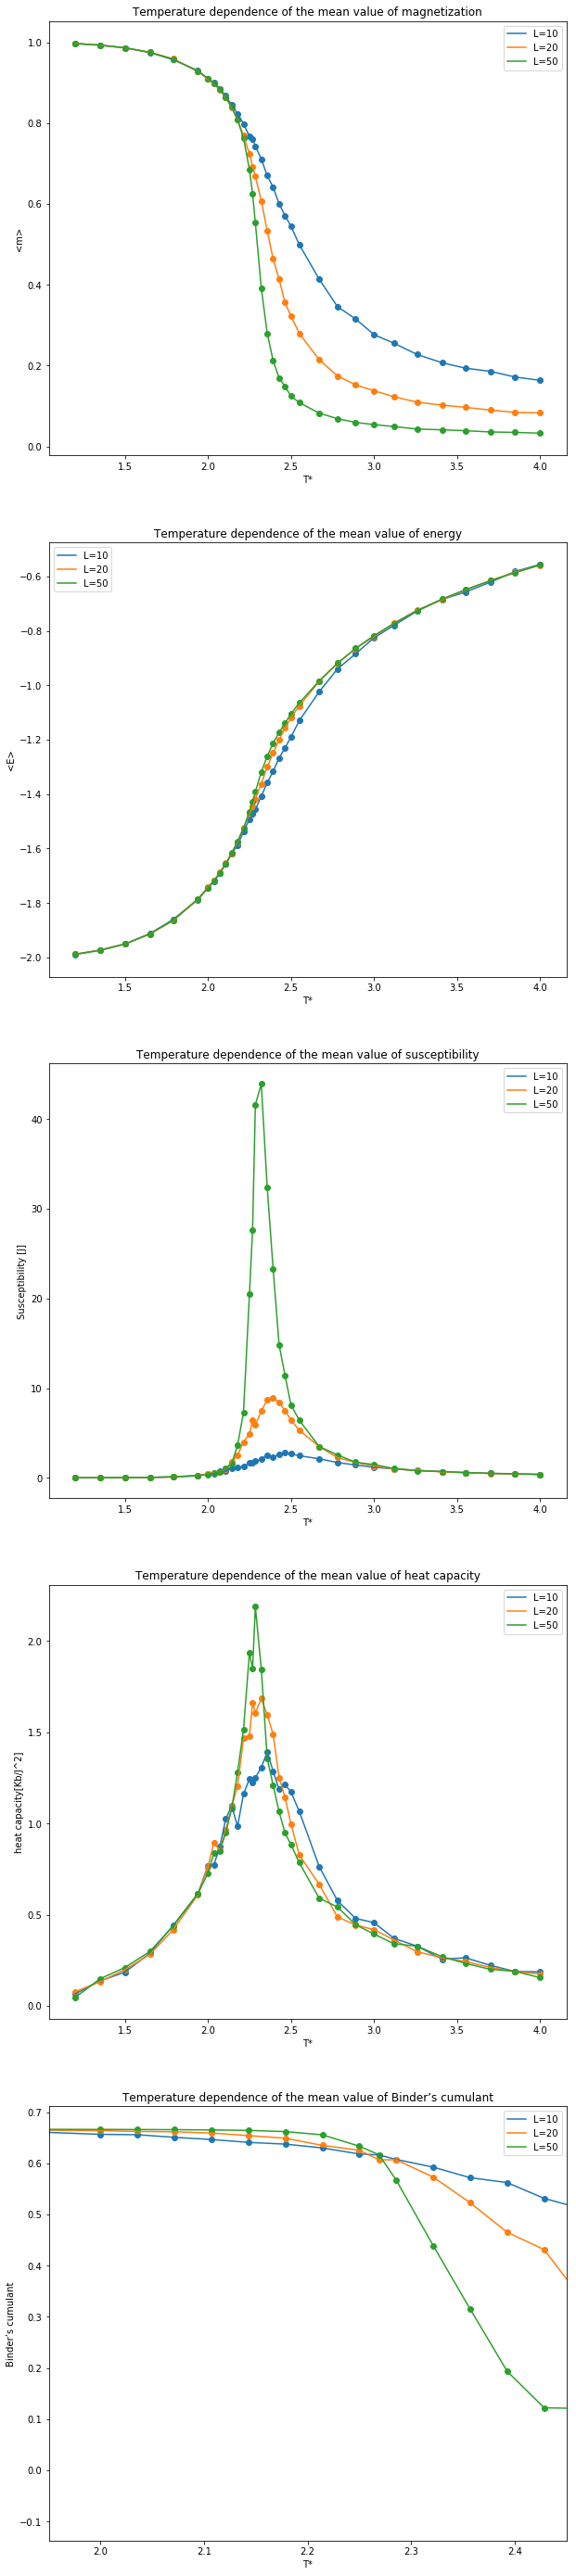

In [5]:
plt.figure(figsize=(10,50))
plt.subplot(5,1,1)
plt.title("Temperature dependence of the mean value of magnetization")
plt.ylabel('<m>')
plt.xlabel('T*')
plt.scatter(df10.temp, sorted(df10.magnet, reverse=True))
plt.plot(df10.temp, sorted(df10.magnet, reverse=True), label='L=10')
plt.scatter(df10.temp, sorted(df20.magnet, reverse=True))
plt.plot(df10.temp, sorted(df20.magnet, reverse=True), label='L=20')
plt.scatter(df10.temp, sorted(df50.magnet, reverse=True))
plt.plot(df10.temp, sorted(df50.magnet, reverse=True), label='L=50')
plt.legend()

plt.subplot(5,1,2)
plt.title("Temperature dependence of the mean value of energy")
plt.ylabel('<E>')
plt.xlabel('T*')
plt.scatter(df10.temp, df10.energy, label=None)
plt.plot(df10.temp, df10.energy, label='L=10')
plt.scatter(df10.temp, df20.energy, label=None)
plt.plot(df10.temp, df20.energy, label='L=20')
plt.scatter(df10.temp, df50.energy, label=None)
plt.plot(df10.temp, df50.energy, label='L=50')
plt.legend()

plt.subplot(5,1,3)
plt.title("Temperature dependence of the mean value of susceptibility")
plt.ylabel('Susceptibility [J]')
plt.xlabel('T*')
plt.scatter(df10.temp, df10.susc, label=None)
plt.plot(df10.temp, df10.susc, label='L=10')
plt.scatter(df10.temp, df20.susc, label=None)
plt.plot(df10.temp, df20.susc, label='L=20')
plt.scatter(df10.temp, df50.susc, label=None)
plt.plot(df10.temp, df50.susc, label='L=50')
plt.legend()

plt.subplot(5,1,4)
plt.title("Temperature dependence of the mean value of heat capacity")
plt.ylabel('heat capacity[Kb/J^2]')
plt.xlabel('T*')
plt.scatter(df10.temp, df10.heat_cap, label=None)
plt.plot(df10.temp, df10.heat_cap, label='L=10')
plt.scatter(df10.temp, df20.heat_cap, label=None)
plt.plot(df10.temp, df20.heat_cap, label='L=20')
plt.scatter(df10.temp, df50.heat_cap, label=None)
plt.plot(df10.temp, df50.heat_cap, label='L=50')
plt.legend()

plt.subplot(5,1,5)
plt.title("Temperature dependence of the mean value of Binder’s cumulant")
plt.ylabel('Binder’s cumulant')
plt.xlabel('T*')
plt.xlim(1.95,2.45)
plt.scatter(df10.temp, df10.bc, label=None)
plt.plot(df10.temp, df10.bc, label='L=10')
plt.scatter(df20.temp, df20.bc, label=None)
plt.plot(df20.temp, df20.bc, label='L=20')
plt.scatter(df10.temp, df50.bc, label=None)
plt.plot(df10.temp, df50.bc, label='L=50')
plt.legend()

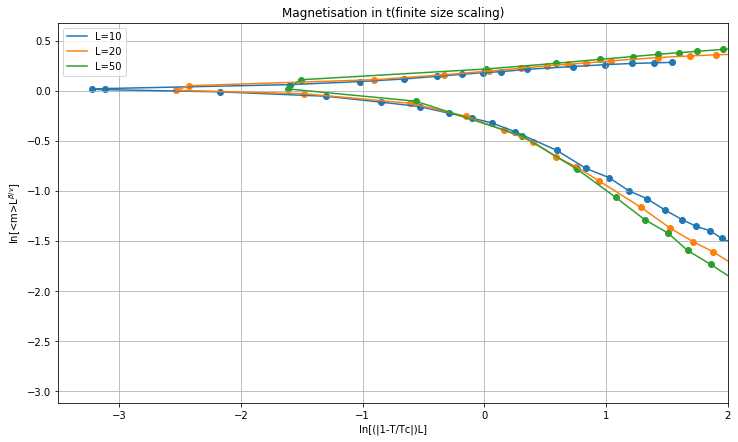

In [4]:
#finite size scaling
plt.figure(figsize=(12,7))
temp_scale = list(map(lambda x: (1-x/2.26)*10, df10.temp))
mag_scale = list(map(lambda x: x*np.power(10, 0.125),df10.magnet))
plt.scatter(np.log(np.abs(temp_scale)), np.log(mag_scale))
plt.plot(np.log(np.abs(temp_scale)), np.log(mag_scale), label="L=10")
temp_scale = list(map(lambda x: (1-x/2.26)*20, df20.temp))
mag_scale = list(map(lambda x: x*np.power(20, 0.125),df20.magnet))
plt.scatter(np.log(np.abs(temp_scale)), np.log(mag_scale))
plt.plot(np.log(np.abs(temp_scale)), np.log(mag_scale), label="L=20")
temp_scale = list(map(lambda x: (1-x/2.26)*50, df50.temp))
mag_scale = list(map(lambda x: x*np.power(50, 0.125),df50.magnet))
plt.scatter(np.log(np.abs(temp_scale)), np.log(mag_scale))
plt.plot(np.log(np.abs(temp_scale)), np.log(mag_scale), label="L=50")
plt.xlabel("ln[(|1-T/Tc|)L]")
plt.ylabel(r"ln[<m>L$^{\beta/v}$]")
plt.title("Magnetisation in t(finite size scaling)")
plt.legend()
plt.xlim(-3.5,2)
plt.grid()
plt.show()